# Wall

In [1]:
import CairoMakie: update_theme!

using Revise
using MMJMesh
using MMJMesh.Meshes
using MMJMesh.Plots
using LinearAlgebra

include("fem.jl")
include("heat.jl")
update_theme!(colormap=:acton)

## Parameters

In [2]:
ti = 20
hi = 1 / 0.13
ta = -10
ha = 1 / 0.04

25.0

## Mesh

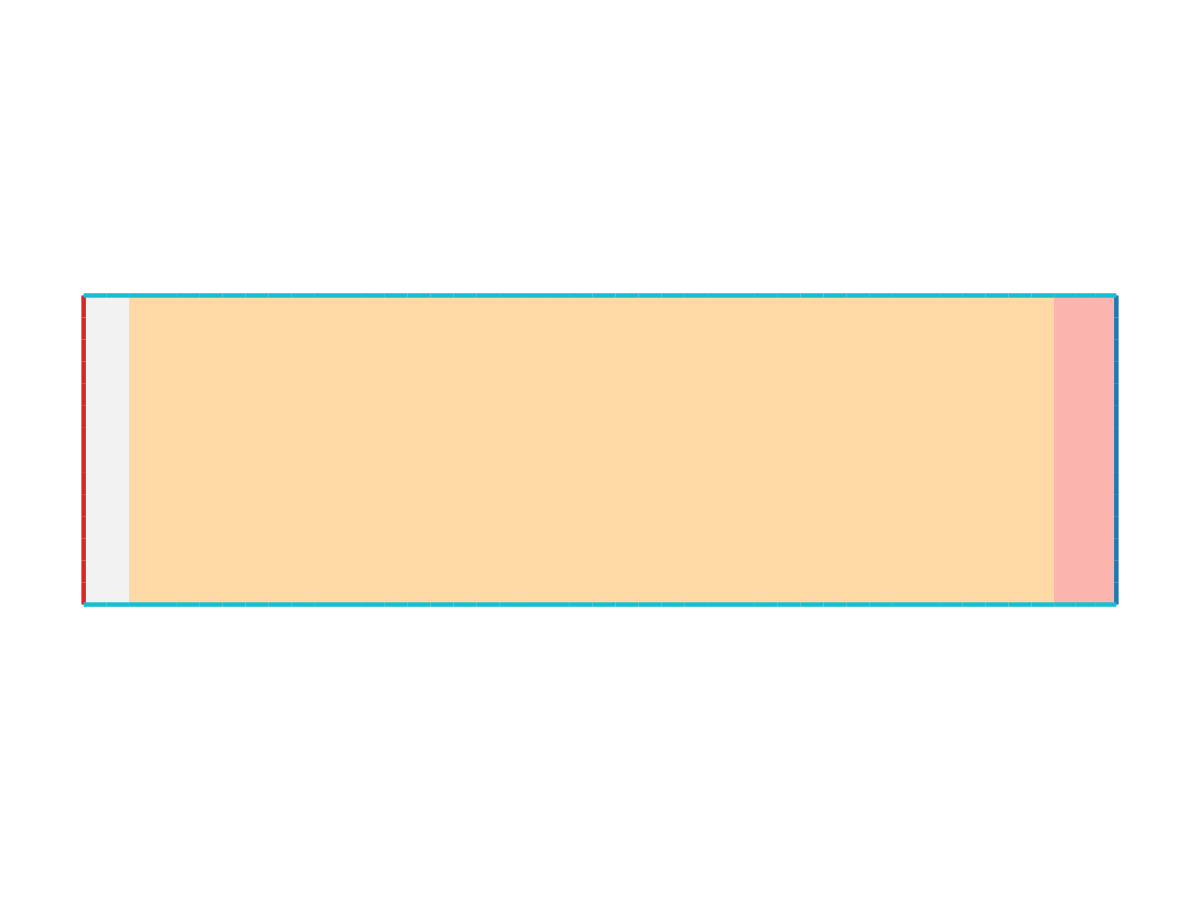

In [3]:
m = Mesh("gmsh/wall.msh")
mplot(m) |> mconf()

## Solution

### Define problem

In [4]:
m.data[:kefunc, :s1] = heatKe(0.7)
m.data[:kefunc, :s2] = heatKe(0.24)
m.data[:kefunc, :s3] = heatKe(0.87)
m.data[:kefunc, :wi] = robinKe(hi)
m.data[:refunc, :wi] = robinRe(hi, ti)
m.data[:kefunc, :wa] = robinKe(ha)
m.data[:refunc, :wa] = robinRe(ha, ta)

(::var"#reFunc#11"{Float64, Int64}) (generic function with 1 method)

### Set up and solve linear system

In [5]:
K, r = assembleKr(m);
θHat =  K \ r;

## Results

### Temperature distribution

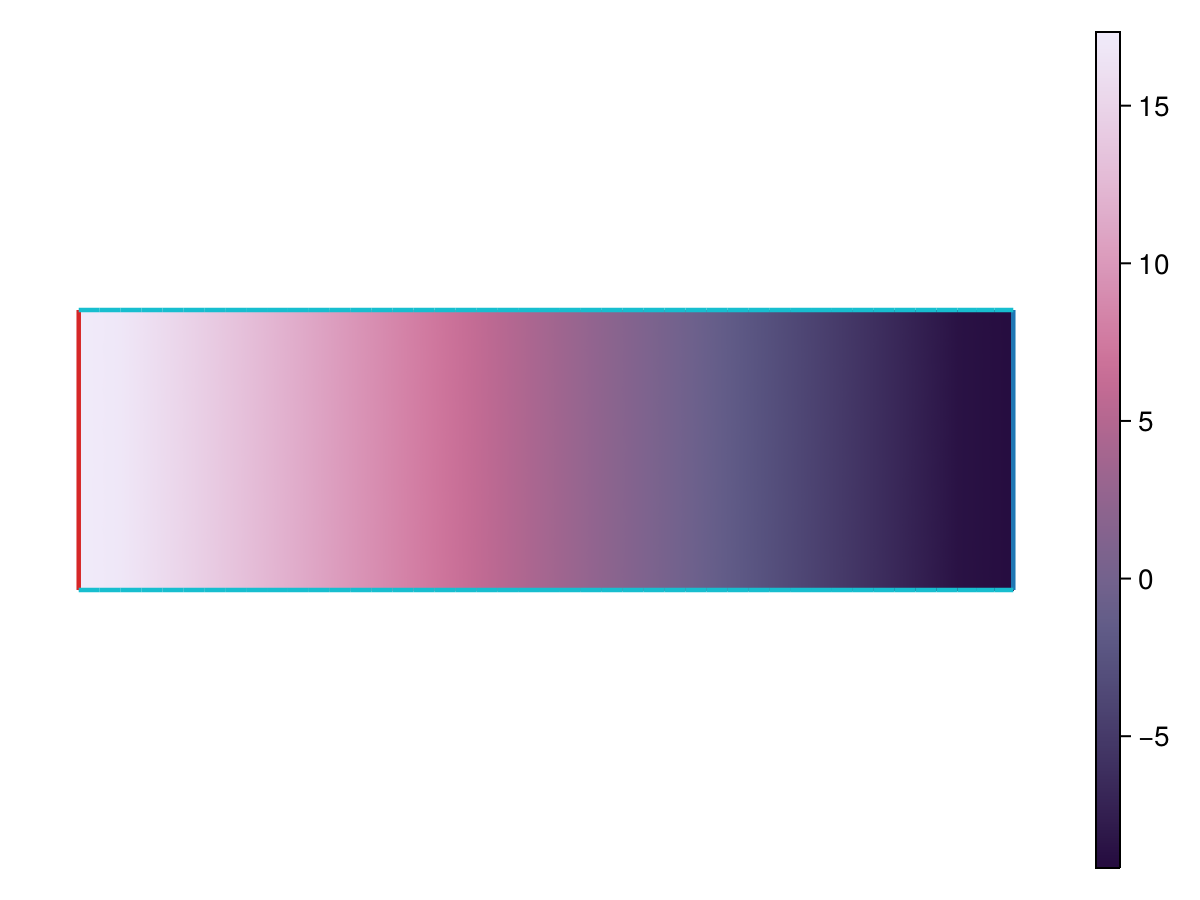

In [6]:
mplot(m, θHat) |> mconf()

### Results

In [7]:
function findNodeAt(m, p) 
    for n ∈ nodes(m)
        if norm(coordinates(n) - p) < 1e-10
            return n.index
        end
    end
    return -1
end

println("1: ", θHat[findNodeAt(m, [0.0; 0])])
println("2: ", θHat[findNodeAt(m, [0.015; 0])])
println("3: ", θHat[findNodeAt(m, [0.315; 0])])
println("4: ", θHat[findNodeAt(m, [0.335; 0])])

1: 17.336824282654774
2: 16.897839274301173
3: -8.709619546326063
4: -9.18056131773991


Values correspond to example from Fischer et al. 